----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.85
Annualized Volatility: 0.31


--Allocation at max Sharpe ratio--

            bydprice  cocoprice  elfprice  koprice  sprice
allocation     10.24      10.38     57.83    20.78    0.78
----------------------------------------------------------------------------------------------------


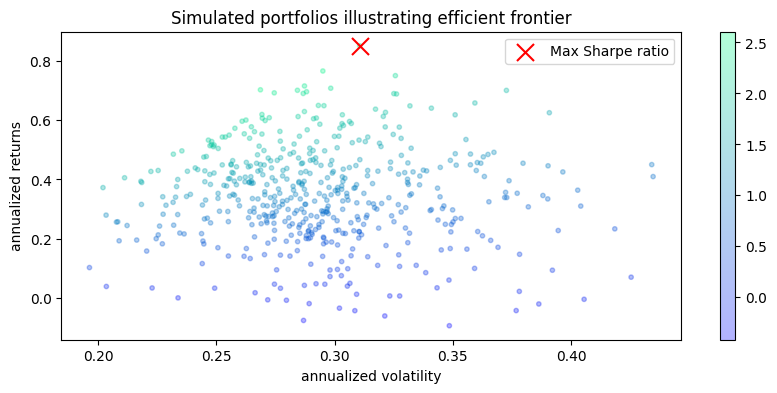

In [6]:
import numpy as np
import pandas as pd
import scipy
import pandas_datareader as web
import seaborn as sns
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Statistical calculation
from scipy.stats import norm


byddata = pd.read_csv('BYD.csv')
cocodata = pd.read_csv('COCO.csv')
elfdata = pd.read_csv('ELF.csv')
kodata = pd.read_csv('KO.csv')
sdata = pd.read_csv('S.csv')
spxdata = pd.read_csv('SPX.csv')

byddata.rename(columns={'Close': 'bydprice'}, inplace=True)
cocodata.rename(columns={'Close': 'cocoprice'}, inplace=True)
elfdata.rename(columns={'Close': 'elfprice'}, inplace=True)
kodata.rename(columns={'Close': 'koprice'}, inplace=True)
sdata.rename(columns={'Close': 'sprice'}, inplace=True)
spxdata.rename(columns={'Close': 'spxprice'}, inplace=True)

byd = byddata['bydprice']
coco = cocodata['cocoprice']
elf = elfdata['elfprice']
ko = kodata['koprice']
s = sdata['sprice']
spx = spxdata['spxprice']
newdataframebeta = pd.concat([byd,coco,elf,ko,s,spx], axis=1)
newdataframe = pd.concat([byd,coco,elf,ko,s], axis=1)
returns = newdataframe.pct_change().dropna()
a = returns.cov()




# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    # Given the avg returns, weights of equities calc. the portfolio return
    returns = np.sum(mean_returns*weights ) *252
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns




def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results,
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((5, num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our 4 equities
        weights = np.random.random(5)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array



returns = newdataframe.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 500
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.0427



def display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    # pull the max portfolio Sharpe ratio (3rd element in results array from
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=newdataframe.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))

    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)

    plt.figure(figsize=(10, 4))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(mean_returns, cov_matrix, num_portfolios, risk_free_rate)